In [694]:
import tweepy
import json
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline 
# For the sake of showing more work here, I find making the width bigger useful
pd.set_option('display.max_colwidth', -1)

# Gather Data

### Read in enhanced tweet archive 

In [775]:
tweet_archive_raw = pd.read_csv('twitter-archive-enhanced.csv')

### Get and read in image predictions programatically

In [776]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_pred.tsv', mode='wb') as file:
    file.write(r.content)
image_pred_raw = pd.read_csv('image_pred.tsv', sep='\t')

### Create Tweepy API Instance

In [6]:
consumer_key = 'key'
consumer_secret = 'secret'
access_token = 'token'
access_secret = 'secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
# test it
tweet = api.get_status(867421006826221569, tweet_mode='extended')
tweet._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed May 24 16:44:18 +0000 2017',
 'display_text_range': [0, 133],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/XZlZKd73go',
    'expanded_url': 'https://twitter.com/dog_rates/status/867421006826221569/photo/1',
    'id': 867420991437365250,
    'id_str': '867420991437365250',
    'indices': [134, 157],
    'media_url': 'http://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg',
    'sizes': {'large': {'h': 1600, 'resize': 'fit', 'w': 1201},
     'medium': {'h': 1200, 'resize': 'fit', 'w': 901},
     'small': {'h': 680, 'resize': 'fit', 'w': 510},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/XZlZKd73go'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/XZlZKd73go',
    'expanded_url': 'https://twitter.com/d

### It looks like retweet count, favorite count, and followers count might be interesting
### Get Tweets and write JSON data to file

In [944]:

tweet_data=[]
for index, rows in tweet_archive_raw.iterrows():
    print(rows.tweet_id)
    try:
        tweet = api.get_status(rows.tweet_id, tweet_mode='extended')._json
        tweet_data.append(tweet)
    except:
        print('No data for: {}'.format(rows.tweet_id))
        
with open('tweet_json.txt', mode='w', encoding='utf-8') as outfile:
    json.dump(tweet_data, outfile)
    

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
No data for: 888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560

822462944365645825
822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950027264
816816676327

766313316352462849
766078092750233600
766069199026450432
766008592277377025
765719909049503744
765669560888528897
765395769549590528
765371061932261376
765222098633691136
764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096
759557299618865152
759447681597108224
759446261539934208
759197388317847553
759159934323924993
759099523532779520
759047813560868866
758854675097

Rate limit reached. Sleeping for: 232


758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
754011816964026368
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
752173152931807232
751950017322246144
751937170840121344
751830394383

705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249383937
700847567345688576
700796979434098688
700747788515

678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944
677187300187611136
676975532580409345


Rate limit reached. Sleeping for: 325


676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956750848
675707330206547968
675706639471

668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547486208
667200525029539841
667192066997374976
667188689915

In [945]:
full_tweets_raw = pd.read_json('tweet_json.txt')

In [946]:
full_tweets_raw.iloc[1]

contributors                     NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [947]:
# list of dictionaries to create dataframe with later
df_list = []
for i, tweet in full_tweets_raw.iterrows():
    tweet_id = tweet.id
    retweets = tweet.retweet_count
    favs = tweet.favorite_count
    followers = tweet.user['followers_count']
    
    # append to df_list
    df_list.append({'tweet_id':tweet_id, 'retweets': retweets,
                   'favs': favs, 'followers': followers})
    
df = pd.DataFrame(df_list, columns=['tweet_id', 'retweets', 'favs', 'followers'])

In [948]:
tweet_archive_raw[tweet_archive_raw.index == 4]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [949]:
tweet_archive_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Let's combine the full tweet data we want now, as it will make assessment more meaningful

In [950]:
full_tweets = tweet_archive_raw.join(df.set_index('tweet_id'), on='tweet_id', how='left')

In [951]:
full_tweets.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers
1086,738166403467907072,NaN,NaN,2016-06-02 00:32:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Axel. He's a professional leaf catcher. 12/10 gifted af https://t.co/P8bgOMMTRs,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/738166403467907072/photo/1,https://twitter.com/dog_rates/status/738166403467907072/photo/1,https://twitter.com/dog_rates/status/738166403467907072/photo/1,https://twitter.com/dog_rates/status/738166403467907072/photo/1",12,10,Axel,None,None,None,None,3766.0,9478.0,5981881.0
355,830956169170665475,NaN,NaN,2017-02-13 01:46:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Reggie. He hates puns. 12/10 lighten pup Reggie https://t.co/X4vNEzAod5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/830956169170665475/video/1,12,10,Reggie,None,None,None,None,1687.0,8617.0,5981655.0


# Assess


### Quality
#### full_tweets
- timestamp is object
- retweets, favs, followers are float. NA's require float in pandas. So leave unless we have subset with complete values
- Some tweets are retweets
- names without capitals aren't names, just words (often after expression like "This is ...")
- retweeted status id in scientific format
- expanded urls sometimes has 2 duplicate entries, sometimes empty
- (889) 2 dogs, 1 name extracted, 2 dog ages read in
- no observation for dog age not null
- some are not dogs? ('we only rate dogs', 'only rate', 'only send', 'please stop') good clue
- not all ratings are out of 10 - often that means more than 1 dog. Other times error.

#### image_pred
- dog breeds sometimes capitalized, sometimes not
- examine 2 dog in photo problem
- we really only want dog breed(s) predicted (we don't have the tools to do something more interesting at this time)

### Tidiness

- doggo-puppo should be 1 column, 'age'
- (Quality) 'age' should be categorical
- Since we're dropping retweets, let's drop retweet data columns
- all tables can be combined into one 

In [952]:
[sum(image_pred_raw.tweet_id.duplicated()), sum(full_tweets.tweet_id.duplicated())]
# so no duplicated tweets in either dataframe

[0, 0]

In [953]:
full_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweets                      23

In [954]:
image_pred_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [955]:
# Check for non-dogs. More on this later
full_tweets[full_tweets.text.str.contains('we only rate dogs')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None,8830.0,31240.0,5981622.0
506,812747805718642688,NaN,NaN,2016-12-24 19:52:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Sammy. At first I was like ""that's a snowflake. we only rate dogs,"" but he would've melted by now, so 10/10 https://t.c…",6.800555e+17,4.196984e+09,2015-12-24 16:00:30 +0000,https://twitter.com/dog_rates/status/680055455951884288/photo/1,10,10,Sammy,None,None,None,None,7903.0,0.0,5981681.0
869,761745352076779520,NaN,NaN,2016-08-06 02:06:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys.. we only rate dogs. Pls don't send any more pics of the Loch Ness Monster. Only send in dogs. Thank you. 11/10 https://t.co/obH5vMbm1j,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761745352076779520/photo/1,11,10,None,None,None,None,None,963.0,4653.0,5981776.0
1085,738184450748633089,NaN,NaN,2016-06-02 01:44:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","For the last time, we only rate dogs. Pls stop sending other animals like this Duck-Billed Platypus. Thank you. 9/10 https://t.co/twxYcPOafl",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738184450748633089/photo/1,9,10,None,None,None,None,None,1334.0,4655.0,5981881.0
1225,714141408463036416,NaN,NaN,2016-03-27 17:25:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I know we only rate dogs, but since it's Easter I guess we could rate a bunny for a change. 10/10 petable as hell https://t.co/O2RlKXigHu",NaN,NaN,NaN,https://twitter.com/dog_rates/status/714141408463036416/photo/1,10,10,None,None,None,None,None,1541.0,4609.0,5981902.0
1356,703425003149250560,7.030419e+17,4.196984e+09,2016-02-27 03:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Really guys? Again? I know this is a rare Albanian Bingo Seal, but we only rate dogs. Only send in dogs... 9/10 https://t.co/6JYLpUmBrC",NaN,NaN,NaN,https://twitter.com/dog_rates/status/703425003149250560/photo/1,9,10,None,None,None,None,None,1527.0,4100.0,5981937.0
1726,680055455951884288,NaN,NaN,2015-12-24 16:00:30 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>","Meet Sammy. At first I was like ""that's a snowflake. we only rate dogs,"" but he would've melted by now, so 10/10 https://t.co/MQfPK4zwuh",NaN,NaN,NaN,https://twitter.com/dog_rates/status/680055455951884288/photo/1,10,10,Sammy,None,None,None,None,7903.0,17981.0,5982016.0


In [956]:
full_tweets.name.sort_values().unique()

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

##### So all the capitalized names look like dog names. Uncapitalized are words, also 'None', which is not null. We should explore those entries more.

##### Many are not dogs

#### First capitalized word after 'name' or 'named' should get most of these

In [957]:
full_tweets.name.sort_values().value_counts()

None         745
a            55 
Charlie      12 
Lucy         11 
Oliver       11 
Cooper       11 
Tucker       10 
Penny        10 
Lola         10 
Bo           9  
Winston      9  
the          8  
Sadie        8  
Toby         7  
Buddy        7  
Daisy        7  
Bailey       7  
an           7  
Bella        6  
Scout        6  
Rusty        6  
Jack         6  
Koda         6  
Stanley      6  
Oscar        6  
Leo          6  
Dave         6  
Milo         6  
Jax          6  
Sunny        5  
            ..  
Chuck        1  
Coopson      1  
Traviss      1  
Emanuel      1  
Ruffles      1  
by           1  
Cora         1  
Fwed         1  
Tebow        1  
Callie       1  
Kathmandu    1  
Shadoe       1  
Craig        1  
Alfy         1  
Scott        1  
Bert         1  
Clarkus      1  
Ito          1  
Shawwn       1  
Gin          1  
Lolo         1  
Livvie       1  
all          1  
Jazzy        1  
Remus        1  
Carper       1  
Randall      1  
Kendall      1

# Clean

In [958]:
tweets = full_tweets.copy()
pics = image_pred_raw.copy()

## Timestamp is object

### Define
Cast as type datetime

In [959]:
# Code
tweets.timestamp = pd.to_datetime(tweets.timestamp)

In [960]:
# Test
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweets                

In [961]:
tweets.loc[2]

tweet_id                      891815181378084864                                                                                                                               
in_reply_to_status_id         NaN                                                                                                                                              
in_reply_to_user_id           NaN                                                                                                                                              
timestamp                     2017-07-31 00:18:03                                                                                                                              
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                               
text                          This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never 

## Some tweets are retweets

### Define
Look for RT at beginning and subset to exclude

In [962]:
# Code
tweets = tweets[~tweets.text.str.startswith('RT')]

In [963]:
# test 
tweets[tweets.text.str.contains('RT')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers
80,877316821321428993,NaN,NaN,2017-06-21 00:06:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Dante. At first he wasn't a fan of his new raincoat, then he saw his reflection. H*ckin handsome. 13/10 for water resistant good boy https://t.co/SHRTIo5pxc",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/877316821321428993/photo/1,https://twitter.com/dog_rates/status/877316821321428993/photo/1",13,10,Dante,None,None,None,None,5297.0,27555.0,5981615.0
959,751251247299190784,NaN,NaN,2016-07-08 03:07:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gilbert. He's being chased by a battalion of miniature floof cows. 10/10 we all believe in you Gilbert https://t.co/wayKZkDRTG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751251247299190784/video/1,10,10,Gilbert,None,None,None,None,6554.0,13585.0,5981863.0
985,749075273010798592,NaN,NaN,2016-07-02 03:00:36,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Boomer. He's self-baptizing. Other doggo not ready to renounce sins. 11/10 spiritually awakened af https://t.co/cRTJiQQk9o,NaN,NaN,NaN,https://vine.co/v/5ztZvHgI17r,11,10,Boomer,doggo,None,None,None,2311.0,6260.0,5981870.0
1037,744709971296780288,NaN,NaN,2016-06-20 01:54:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Harvey. He's stealthy af. 10/10 would do my best to pet https://t.co/zAzaRT6NnT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744709971296780288/photo/1,10,10,Harvey,None,None,None,None,1727.0,6045.0,5981877.0
1116,732585889486888962,NaN,NaN,2016-05-17 14:57:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","When your teacher agreed on 10,000 RTs and no final but after 24 hours you only have 37... 10/10 https://t.co/sVnJfWVjUp",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/732585889486888962/photo/1,https://twitter.com/dog_rates/status/732585889486888962/photo/1",10,10,None,None,None,None,None,851.0,3962.0,5981885.0
1182,718971898235854848,NaN,NaN,2016-04-10 01:20:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sadie. She is prepared for battle. 10/10 https://t.co/JRckDkZVRT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718971898235854848/photo/1,10,10,Sadie,None,None,None,None,1211.0,3751.0,5981894.0
1650,683515932363329536,NaN,NaN,2016-01-03 05:11:12,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",HEY PUP WHAT'S THE PART OF THE HUMAN BODY THAT CONNECTS THE FOOT AND THE LEG? 11/10 so smart https://t.co/XQ1tRUmO3z,NaN,NaN,NaN,https://vine.co/v/ibvnzrauFuV,11,10,None,None,None,None,None,3224.0,7944.0,5982003.0
1766,678399652199309312,NaN,NaN,2015-12-20 02:20:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This made my day. 12/10 please enjoy https://t.co/VRTbo3aAcm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678399652199309312/video/1,12,10,None,None,None,None,None,30255.0,61423.0,5982021.0
1991,672622327801233409,NaN,NaN,2015-12-04 03:43:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This lil pupper is sad because we haven't found Kony yet. RT to spread awareness. 12/10 would pet firmly https://t.co/Cv7dRdcMvQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672622327801233409/photo/1,12,10,None,None,None,pupper,None,526.0,1353.0,5982136.0


##### Looks like all the retweets are gone

In [964]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2173 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2173 non-null datetime64[ns]
source                        2173 non-null object
text                          2173 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2115 non-null object
rating_numerator              2173 non-null int64
rating_denominator            2173 non-null int64
name                          2173 non-null object
doggo                         2173 non-null object
floofer                       2173 non-null object
pupper                        2173 non-null object
puppo                         2173 non-null object
retweets                      

## Some dog names aren't names

### Define 
Of the list of weird names, check for first capitalized word after 'name' of 'named' set as name.
Check what's left. 

In [965]:
word_list = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his',
       'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my',
       'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the',
       'this', 'unacceptable', 'very', 'None']
dog_name_weird = tweets[tweets.name.isin(word_list)].copy()
dog_name_weird

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None,3170.0,20358.0,5981603.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None,19215.0,66004.0,5981606.0
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo,10237.0,48360.0,5981605.0
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None,11852.0,46516.0,5981606.0
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None,10571.0,33897.0,5981606.0
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None,6062.0,30765.0,5981606.0
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,4.0,117.0,5981609.0
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None,3827.0,20564.0,5981609.0
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/8851676

In [966]:
dog_name_weird.index

Int64Index([   5,    7,   12,   22,   24,   25,   30,   35,   37,   41,
            ...
            2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355],
           dtype='int64', length=782)

In [967]:
# Code

for i, row in dog_name_weird.iterrows():
    if 'name' in row.text:
        
        dog_name_weird.loc[i,'name'] = row.text.split('name')[1].split()[1].strip('.,')
       

In [968]:
dog_name_weird.name.value_counts()

None            665
a               35 
the             8  
an              5  
very            4  
one             4  
just            3  
quite           3  
Zoey            2  
not             2  
getting         2  
actually        2  
Tickles         1  
Big             1  
Guss            1  
Wylie           1  
Dog             1  
light           1  
Kip             1  
old             1  
across          1  
Alphred         1  
Jacob           1  
Alfredo         1  
Johm            1  
Berta           1  
Leroi           1  
mad             1  
all             1  
Hemry           1  
Pepe            1  
Charley         1  
unacceptable    1  
space           1  
Thea            1  
Howard          1  
Klint           1  
Chuk            1  
Zeus            1  
Pablo           1  
Rufus           1  
officially      1  
Sabertooth      1  
Cherokee        1  
by              1  
such            1  
incredibly      1  
Kohl            1  
Jessiga         1  
infuriating     1  


##### So we've replaced some of the names 

In [969]:
dog_name_weird[~dog_name_weird.name.isin(word_list)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,Howard,None,None,None,None,3827.0,20564.0,5981609.0
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,Pablo,None,None,None,None,1156.0,8996.0,5981617.0
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811541651456/photo/1,13,10,Zoey,None,None,None,puppo,1669.0,19214.0,5981619.0
843,766714921925144576,7.667118e+17,4.196984e+09,2016-08-19 19:14:16,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley,NaN,NaN,NaN,NaN,13,10,Charley,None,None,None,None,429.0,2834.0,5981768.0
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,Zoey,None,None,None,None,3800.0,28595.0,5981771.0
1596,686286779679375361,NaN,NaN,2016-01-10 20:41:33,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",When bae calls your name from across the room. 12/10 (vid by @christinemcc98) https://t.co/xolcXA6gxe,NaN,NaN,NaN,https://vine.co/v/iMZx6aDbExn,12,10,across,None,None,None,None,1853.0,4322.0,5981990.0
1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682047327939461121/photo/1,10,10,Thea,None,None,None,None,1072.0,3469.0,5982008.0
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679736210798047232/photo/1,9,10,Sabertooth,None,None,None,None,890.0,2263.0,5982018.0
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,Wylie,None,None,None,None,104.0,681.0,5982118.0
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named

##### And they seem to be right, although still a few errors

In [970]:
dog_name_weird[dog_name_weird.name.isin(word_list)]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None,3170.0,20358.0,5981603.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None,19215.0,66004.0,5981606.0
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo,10237.0,48360.0,5981605.0
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None,11852.0,46516.0,5981606.0
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None,10571.0,33897.0,5981606.0
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None,6062.0,30765.0,5981606.0
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,4.0,117.0,5981609.0
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13,10,None,None,None,None,None,4454.0,22095.0,5981609.0
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itse

In [971]:
# Replace rows in tweets with corresponding dog_name_weird row
tweets[tweets.index.isin(dog_name_weird.index)] = dog_name_weird

In [972]:
# test
tweets[(tweets.index.isin(dog_name_weird.index)) & (~tweets.name.isin(word_list))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,Howard,None,None,None,None,3827.0,20564.0,5981609.0
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,Pablo,None,None,None,None,1156.0,8996.0,5981617.0
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811541651456/photo/1,13,10,Zoey,None,None,None,puppo,1669.0,19214.0,5981619.0
843,766714921925144576,7.667118e+17,4.196984e+09,2016-08-19 19:14:16,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley,NaN,NaN,NaN,NaN,13,10,Charley,None,None,None,None,429.0,2834.0,5981768.0
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,Zoey,None,None,None,None,3800.0,28595.0,5981771.0
1596,686286779679375361,NaN,NaN,2016-01-10 20:41:33,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",When bae calls your name from across the room. 12/10 (vid by @christinemcc98) https://t.co/xolcXA6gxe,NaN,NaN,NaN,https://vine.co/v/iMZx6aDbExn,12,10,across,None,None,None,None,1853.0,4322.0,5981990.0
1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682047327939461121/photo/1,10,10,Thea,None,None,None,None,1072.0,3469.0,5982008.0
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679736210798047232/photo/1,9,10,Sabertooth,None,None,None,None,890.0,2263.0,5982018.0
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,Wylie,None,None,None,None,104.0,681.0,5982118.0
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named

In [973]:
# Let's replace the remaining non-names with 'None'
for i, row in tweets.iterrows():
    if row.loc['name'].islower():
        tweets.loc[i,'name']='None'
    
assert (~tweets.name.str.islower()).all()
tweets.loc[tweets.name=='a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers


In [974]:
tweets.name.value_counts()

None         749
Charlie      11 
Lucy         11 
Cooper       10 
Oliver       10 
Penny        9  
Tucker       9  
Sadie        8  
Lola         8  
Winston      8  
Toby         7  
Daisy        7  
Oscar        6  
Stanley      6  
Jax          6  
Bo           6  
Bailey       6  
Bella        6  
Koda         6  
Milo         5  
Zoey         5  
Buddy        5  
Chester      5  
Leo          5  
Dave         5  
Louis        5  
Rusty        5  
Scout        5  
Bentley      5  
Larry        4  
            ..  
Snoop        1  
Mimosa       1  
Acro         1  
Duddles      1  
Shawwn       1  
Canela       1  
Derby        1  
Clarkus      1  
Gerbald      1  
Bode         1  
Newt         1  
Julio        1  
Cilantro     1  
Andru        1  
Jed          1  
Marlee       1  
Grizzwald    1  
Fynn         1  
Rhino        1  
Fwed         1  
Callie       1  
Kathmandu    1  
Shadoe       1  
Meyer        1  
Alfy         1  
Scott        1  
Tayzie       1  
Shaggy       1

### Some names may be mispellings, but people are weird about names

In [975]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2173 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2173 non-null datetime64[ns]
source                        2173 non-null object
text                          2173 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2115 non-null object
rating_numerator              2173 non-null int64
rating_denominator            2173 non-null int64
name                          2173 non-null object
doggo                         2173 non-null object
floofer                       2173 non-null object
pupper                        2173 non-null object
puppo                         2173 non-null object
retweets                      

## In reply to fields display in scientific notation

### Define
Use float formatter. This was you don't have to worry about nulls.

In [976]:
# Code 
tweets.in_reply_to_status_id = tweets.in_reply_to_status_id.apply(lambda x: '{:.0f}'.format(x))
tweets.in_reply_to_user_id = tweets.in_reply_to_user_id.apply(lambda x: '{:.0f}'.format(x))

In [977]:
# Test 
tweets[tweets.in_reply_to_status_id!='nan']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers
30,886267009285017600,886266357075128320,2281181600,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,4.0,117.0,5981609.0
55,881633300179243008,881607037314052096,47384430,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None,7.0,129.0,5981612.0
64,879674319642796034,879553827334172672,3105440746,2017-06-27 12:14:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None,10.0,314.0,5981612.0
113,870726314365509632,870726202742493184,16487760,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None,3.0,120.0,5981614.0
148,863427515083354112,863425645568774144,77596200,2017-05-13 16:15:35,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,103.0,2325.0,5981617.0
149,863079547188785154,667152164079423488,4196983835,2017-05-12 17:12:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,Pablo,None,None,None,None,1156.0,8996.0,5981617.0
179,857214891891077121,857156678055342080,180670967,2017-04-26 12:48:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,20.0,239.0,5981622.0
184,856526610513747968,855818117272018944,4196983835,2017-04-24 15:13:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,None,None,None,None,2013.0,12289.0,5981622.0
186,856288084350160898,856286004109553664,279280991,2017-04-23 23:26:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None,17.0,533.0,5981622.0
188,855862651834028034,855861584463351808,194351775,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None,28.0,361.0,5981622.0


## Multiple urls, just copy of same picture

### Define
Find the entries with more than 1, split them by comma, take the first entry

In [978]:
tweets.loc[4]

tweet_id                      891327558926688256                                                                                                                                                
in_reply_to_status_id         nan                                                                                                                                                               
in_reply_to_user_id           nan                                                                                                                                                               
timestamp                     2017-07-29 16:00:24                                                                                                                                               
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                                
text                          This 

In [979]:
# Code
for i, row in tweets.iterrows():
    if pd.notnull(row.expanded_urls):
        tweets.loc[i,'expanded_urls'] = row.expanded_urls.split(',')[0]


In [980]:
# Test
tweets.expanded_urls.head(11)

0     https://twitter.com/dog_rates/status/892420643555336193/photo/1
1     https://twitter.com/dog_rates/status/892177421306343426/photo/1
2     https://twitter.com/dog_rates/status/891815181378084864/photo/1
3     https://twitter.com/dog_rates/status/891689557279858688/photo/1
4     https://twitter.com/dog_rates/status/891327558926688256/photo/1
5     https://twitter.com/dog_rates/status/891087950875897856/photo/1
6     https://gofundme.com/ydvmve-surgery-for-jax                    
7     https://twitter.com/dog_rates/status/890729181411237888/photo/1
8     https://twitter.com/dog_rates/status/890609185150312448/photo/1
9     https://twitter.com/dog_rates/status/890240255349198849/photo/1
10    https://twitter.com/dog_rates/status/890006608113172480/photo/1
Name: expanded_urls, dtype: object

## More than one dog age

### Define
Find entries with more than one dog age. Manually alter if it's short

In [981]:
tweets.loc[956]

tweet_id                      751583847268179968                                                                                                                      
in_reply_to_status_id         nan                                                                                                                                     
in_reply_to_user_id           nan                                                                                                                                     
timestamp                     2016-07-09 01:08:47                                                                                                                     
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                      
text                          Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg

In [982]:
# Code
multiple_dogs = []
for i, row in tweets.iterrows():
    word_count = 0
    if row.doggo == 'None':
        word_count +=1
    if row.floofer == 'None':
        word_count +=1
    if row.pupper == 'None':
        word_count +=1
    if row.puppo == 'None':
        word_count +=1
    if word_count <3:
        multiple_dogs.append(row)
multi_dog = pd.DataFrame(multiple_dogs)
multi_dog

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers
191,855851453814013952,nan,nan,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo,18857.0,47234.0,5981622.0
200,854010172552949760,nan,nan,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172552949760/photo/1,11,10,None,doggo,floofer,None,None,3378.0,16923.0,5981621.0
460,817777686764523521,nan,nan,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None,3017.0,11712.0,5981670.0
531,808106460588765185,nan,nan,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None,2471.0,9579.0,5981687.0
565,802265048156610565,733109485275860992,4196983835,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None,1545.0,6972.0,5981695.0
575,801115127852503040,nan,nan,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127852503040/photo/1,12,10,Bones,doggo,None,pupper,None,2371.0,8882.0,5981459.0
705,785639753186217984,nan,nan,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753186217984/photo/1,10,10,Pinot,doggo,None,pupper,None,2514.0,8595.0,5981739.0
733,781308096455073793,nan,nan,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None,2891.0,7846.0,5981748.0
889,759793422261743616,nan,nan,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422261743616/photo/1,12,10,Maggie,doggo,None,pupper,None,2137.0,6495.0,5981777.0
956,751583847268179968,nan,nan,2016-07-09 01:08:47,"<a href=""http://twitte

#### List is short, difficult to parse, manual fastest

After this fix, 2 entries will mean 2 dogs 

956 doggo
705 doggo
575 pupper
460 pupper
200 floofer
191 puppo

In [983]:
multi_dog.loc[956, 'pupper'] = 'None'
multi_dog.loc[705, 'pupper'] = 'None'
multi_dog.loc[575, 'doggo'] = 'None'
multi_dog.loc[460, 'doggo'] = 'None'
multi_dog.loc[200, 'doggo'] = 'None'
multi_dog.loc[191, 'doggo'] = 'None'
# there are 6 entries with 2 dogs


In [984]:
# let's look at the 2 dog entries
multiple_dogs = []
for i, row in multi_dog.iterrows():
    word_count = 0
    if row.doggo == 'None':
        word_count +=1
    if row.floofer == 'None':
        word_count +=1
    if row.pupper == 'None':
        word_count +=1
    if row.puppo == 'None':
        word_count +=1
    if word_count <3:
        multiple_dogs.append(row)
real_multi_dog = pd.DataFrame(multiple_dogs)
real_multi_dog



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers
531,808106460588765185,nan,nan,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None,2471.0,9579.0,5981687.0
565,802265048156610565,733109485275860992,4196983835,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None,1545.0,6972.0,5981695.0
733,781308096455073793,nan,nan,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None,2891.0,7846.0,5981748.0
889,759793422261743616,nan,nan,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422261743616/photo/1,12,10,Maggie,doggo,None,pupper,None,2137.0,6495.0,5981777.0
1063,741067306818797568,nan,nan,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,None,doggo,None,pupper,None,3433.0,10188.0,5981881.0
1113,733109485275860992,nan,nan,2016-05-19 01:38:16,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485275860992/photo/1,12,10,None,doggo,None,pupper,None,17488.0,45679.0,5981883.0


In [985]:
# We need to pick just one age to make some later work cleaner. 
# Since puppies are cuter than dogs, we'll classify them as puppers
real_multi_dog.doggo='None'
real_multi_dog[real_multi_dog.tweet_id.isin(multi_dog.tweet_id)]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers
531,808106460588765185,nan,nan,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,None,None,pupper,None,2471.0,9579.0,5981687.0
565,802265048156610565,733109485275860992,4196983835,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,None,None,pupper,None,1545.0,6972.0,5981695.0
733,781308096455073793,nan,nan,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,None,None,pupper,None,2891.0,7846.0,5981748.0
889,759793422261743616,nan,nan,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422261743616/photo/1,12,10,Maggie,None,None,pupper,None,2137.0,6495.0,5981777.0
1063,741067306818797568,nan,nan,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,None,None,None,pupper,None,3433.0,10188.0,5981881.0
1113,733109485275860992,nan,nan,2016-05-19 01:38:16,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485275860992/photo/1,12,10,None,None,None,pupper,None,17488.0,45679.0,5981883.0


In [986]:
# Replace rows in tweets with corresponding multi_dog row
tweets[tweets.index.isin(multi_dog.index)] = multi_dog

In [987]:
# Replace rows in tweets with corresponding real_multi_dog row
tweets[tweets.index.isin(real_multi_dog.index)] = real_multi_dog

In [988]:
# Test
tweets[tweets.index.isin(multi_dog.index)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers
191,855851453814013952,nan,nan,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,None,None,None,puppo,18857.0,47234.0,5981622.0
200,854010172552949760,nan,nan,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172552949760/photo/1,11,10,None,None,floofer,None,None,3378.0,16923.0,5981621.0
460,817777686764523521,nan,nan,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,None,None,pupper,None,3017.0,11712.0,5981670.0
531,808106460588765185,nan,nan,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,None,None,pupper,None,2471.0,9579.0,5981687.0
565,802265048156610565,733109485275860992,4196983835,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,None,None,pupper,None,1545.0,6972.0,5981695.0
575,801115127852503040,nan,nan,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127852503040/photo/1,12,10,Bones,None,None,pupper,None,2371.0,8882.0,5981459.0
705,785639753186217984,nan,nan,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753186217984/photo/1,10,10,Pinot,doggo,None,None,None,2514.0,8595.0,5981739.0
733,781308096455073793,nan,nan,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,None,None,pupper,None,2891.0,7846.0,5981748.0
889,759793422261743616,nan,nan,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422261743616/photo/1,12,10,Maggie,None,None,pupper,None,2137.0,6495.0,5981777.0
956,751583847268179968,nan,nan,2016-07-09 01:08:47,"<a href=""http://twitter.com/down

In [989]:
tweets = tweets.replace('None', '')

In [990]:
tweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers
389,826476773533745153,nan,nan,2017-01-31 17:06:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pilot. He has mastered the synchronized head tilt and sneaky tongue slip. Usually not unlocked until later doggo days. 12/10 https://t.co/YIV8sw8xkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826476773533745153/photo/1,12,10,Pilot,doggo,,,,4717.0,20007.0,5981656.0
1088,737826014890496000,nan,nan,2016-06-01 02:00:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Remy. He has some long ass ears (probably magical). Also very proud of broken stick. 10/10 such a good boy https://t.co/EZx0YjPjPK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737826014890496000/photo/1,10,10,Remy,,,,,1963.0,5667.0,5981881.0
181,857029823797047296,nan,nan,2017-04-26 00:33:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zeke. He performs group cheeky wink tutorials. Pawfect execution here. 12/10 would wink back https://t.co/uMH5CLjXJu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857029823797047296/photo/1,12,10,Zeke,,,,,4268.0,19647.0,5981622.0
1826,676440007570247681,nan,nan,2015-12-14 16:34:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Hope your Monday isn't too awful. Here's two baseball puppers. 11/10 for each https://t.co/dB0H9hdZai,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676440007570247681/photo/1,11,10,,,,,,734.0,1831.0,5982111.0
1806,676936541936185344,nan,nan,2015-12-16 01:27:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.co/mqvaxleHRz,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676936541936185344/photo/1,8,10,,,,pupper,,5402.0,13582.0,5982107.0


## Some are not dogs

### Define
Visually examine text and come up with some filter phrases

In [991]:
# Code 
not_dog_phrases = ['we only rate dogs', 'only rate', 'only send', 'please stop']
not_dog_jokes = tweets[tweets.text.str.contains('|'.join(not_dog_phrases))]

### Inspection of these photos reveals that these really are dogs, and it's just his sense of humor.

#### We could create a column to indicate these are dressed up/strangely presented dogs to examine how the image predictor handles these cases. 



In [992]:
tweets['joke'] = False

In [993]:
not_dog_jokes

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers
25,887101392804085760,nan,nan,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,,,,,,6062.0,30765.0,5981606.0
47,883117836046086144,nan,nan,2017-07-07 00:17:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E",NaN,NaN,NaN,https://twitter.com/dog_rates/status/883117836046086144/photo/1,13,10,,,,,,6786.0,37478.0,5981610.0
59,880872448815771648,nan,nan,2017-06-30 19:35:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448815771648/photo/1,12,10,,,,,,3893.0,21446.0,5981611.0
89,875021211251597312,nan,nan,2017-06-14 16:04:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys please stop sending pictures without any dogs in th- oh never mind hello excuse me sir. 12/10 stealthy as h*ck https://t.co/brCQoqc8AW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875021211251597312/photo/1,12,10,,,,,,4811.0,25693.0,5981614.0
93,874057562936811520,nan,nan,2017-06-12 00:15:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY9PQhtP2",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562936811520/photo/1,12,10,,,,,,4049.0,22832.0,5981614.0
127,867900495410671616,nan,nan,2017-05-26 00:29:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Unbelievable. We only rate dogs. Please don't send in non-canines like the ""I"" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDNv5wXZ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495410671616/photo/1,12,10,,,,,,4346.0,24646.0,5981615.0
131,867051520902168576,nan,nan,2017-05-23 16:16:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Oh my this spooked me up. We only rate dogs, not happy ghosts. Please send dogs only. It's a very simple premise. Thank you... 13/10 https://t.co/M5Rz0R8SIQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520902168576/photo/1,13,10,,,,,,8227.0,32946.0,5981615.0
141,864873206498414592,nan,nan,2017-05-17 16:00:15,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimate. Thank you... 14/10 https://t.co/wr3xsjeCIR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864873206498414592/photo/1,14,10,,,,,,9165.0,33182.0,5981617.0
154,862096992088072192,nan,nan,2017-05-10 00:08:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please don't send perfectly toasted marshmallows attempting to drive. Thank you... 13/10 https://t.co/nvZyyrp0kd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862096992088072192/photo/1,13,10,,,,,,24570.0,76935.0,5981617.0
169,859196978902773760,nan,nan,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We onl

In [994]:
tweets.loc[tweets.index.isin(not_dog_jokes.index),'joke'] = True

tweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers,joke
1482,693267061318012928,nan,nan,2016-01-30 02:58:42,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Oscar. He can wave. Friendly af. 12/10 would totally wave back (IG: Oscar.is.bear) https://t.co/waN6EW0wfM,NaN,NaN,NaN,https://vine.co/v/i5n2irFUYWv,...,10,Oscar,,,,,906.0,2567.0,5981968.0,False
127,867900495410671616,nan,nan,2017-05-26 00:29:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Unbelievable. We only rate dogs. Please don't send in non-canines like the ""I"" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDNv5wXZ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495410671616/photo/1,...,10,,,,,,4346.0,24646.0,5981615.0,True
368,828708714936930305,nan,nan,2017-02-06 20:55:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fiona. She's an exotic dog. Seems rather impatient. Jaw extension on another level tho. Looks slippery. 10/10 would still pet https://t.co/vst2SEVJO3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828708714936930305/photo/1,...,10,Fiona,,,,,12594.0,39676.0,5981657.0,False
256,843981021012017153,nan,nan,2017-03-21 00:22:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HE WAS DOING A SNOOZE NO SHAME IN A SNOOZE 13/10 https://t.co/Gu5wHx3CBd,NaN,NaN,NaN,https://twitter.com/brianstack153/status/796796054100471809,...,10,,,,,,3216.0,16117.0,5981633.0,False
172,858843525470990336,nan,nan,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525470990336/photo/1,...,10,,doggo,,,,3685.0,16089.0,5981620.0,False


In [995]:
# Test
tweets.loc[tweets.index.isin(not_dog_jokes.index)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers,joke
25,887101392804085760,nan,nan,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,...,10,,,,,,6062.0,30765.0,5981606.0,True
47,883117836046086144,nan,nan,2017-07-07 00:17:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E",NaN,NaN,NaN,https://twitter.com/dog_rates/status/883117836046086144/photo/1,...,10,,,,,,6786.0,37478.0,5981610.0,True
59,880872448815771648,nan,nan,2017-06-30 19:35:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448815771648/photo/1,...,10,,,,,,3893.0,21446.0,5981611.0,True
89,875021211251597312,nan,nan,2017-06-14 16:04:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys please stop sending pictures without any dogs in th- oh never mind hello excuse me sir. 12/10 stealthy as h*ck https://t.co/brCQoqc8AW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875021211251597312/photo/1,...,10,,,,,,4811.0,25693.0,5981614.0,True
93,874057562936811520,nan,nan,2017-06-12 00:15:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY9PQhtP2",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562936811520/photo/1,...,10,,,,,,4049.0,22832.0,5981614.0,True
127,867900495410671616,nan,nan,2017-05-26 00:29:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Unbelievable. We only rate dogs. Please don't send in non-canines like the ""I"" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDNv5wXZ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495410671616/photo/1,...,10,,,,,,4346.0,24646.0,5981615.0,True
131,867051520902168576,nan,nan,2017-05-23 16:16:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Oh my this spooked me up. We only rate dogs, not happy ghosts. Please send dogs only. It's a very simple premise. Thank you... 13/10 https://t.co/M5Rz0R8SIQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520902168576/photo/1,...,10,,,,,,8227.0,32946.0,5981615.0,True
141,864873206498414592,nan,nan,2017-05-17 16:00:15,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimate. Thank you... 14/10 https://t.co/wr3xsjeCIR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864873206498414592/photo/1,...,10,,,,,,9165.0,33182.0,5981617.0,True
154,862096992088072192,nan,nan,2017-05-10 00:08:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please don't send perfectly toasted marshmallows attempting to drive. Thank you... 13/10 https://t.co/nvZyyrp0kd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862096992088072192/photo/1,...,10,,,,,,24570.0,76935.0,5981617.0,True
169,859196978902773760,nan,nan,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r

In [996]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2173 non-null int64
in_reply_to_status_id         2173 non-null object
in_reply_to_user_id           2173 non-null object
timestamp                     2173 non-null datetime64[ns]
source                        2173 non-null object
text                          2173 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2115 non-null object
rating_numerator              2173 non-null int64
rating_denominator            2173 non-null int64
name                          2173 non-null object
doggo                         2173 non-null object
floofer                       2173 non-null object
pupper                        2173 non-null object
puppo                         2173 non-null object
retweets                   

## Not all ratings are out of 10

### Define
Any number not a multiple of 10 needs to be dealt with. Multiples of 10 are multi-dog
If denominator 0 or not multiple of 10, search text for another number that is, return that as denominator, and number on left of / as numerator

In [997]:
strange_ratings = tweets[tweets.rating_denominator!=10].copy()
for i, row in strange_ratings.iterrows():
    if (row.rating_denominator == 0 or row.rating_denominator%10 !=0):
        
        fraction = re.findall(r"(\d+/[1-9]+0+)",row.text)
        if (fraction):
            top = fraction[0].split('/')[0]
            bottom = fraction[0].split('/')[1]
            strange_ratings.loc[i,'rating_numerator'] = top
            strange_ratings.loc[i,'rating_denominator'] = bottom


In [998]:
strange_ratings

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers,joke
313,835246439529840640,835245984028504064,26259576,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,...,10,,,,,,81.0,2238.0,5981647.0,False
342,832088576586297345,832087547559997440,30582082,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,...,15,,,,,,2.0,72.0,5981649.0,False
433,820690176645140481,nan,nan,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176645140481/photo/1,...,70,,,,,,3641.0,13358.0,5981662.0,False
516,810984652412424192,nan,nan,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,https://www.gofundme.com/sams-smile,...,7,Sam,,,,,1624.0,5858.0,5981683.0,False
902,758467244762497024,nan,nan,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,...,150,,,,,,2489.0,5238.0,5981856.0,False
1068,740373189193256964,nan,nan,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189193256964/photo/1,...,10,,,,,,14753.0,37437.0,5981881.0,False
1120,731156023742988288,nan,nan,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,...,170,,,,,,1400.0,4125.0,5981886.0,False
1165,722974582966214656,nan,nan,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,...,20,,,,,,1728.0,4414.0,5981893.0,False
1202,716439118184652801,nan,nan,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,...,50,Bluebert,,,,,241.0,2534.0,5981896.0,False
1228,713900603437621249,nan,nan,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,...,90,,,,,,820.0,3023.0,5981903.0,False


In [999]:
# we can fix the few left manually
strange_ratings.loc[342,'rating_numerator'] = np.nan
strange_ratings.loc[342,'rating_denominator'] = np.nan
strange_ratings.loc[516,'rating_numerator'] = np.nan
strange_ratings.loc[516,'rating_denominator'] = np.nan
strange_ratings.loc[1165,'rating_numerator'] = 13
strange_ratings.loc[1165,'rating_denominator'] = 10
strange_ratings.loc[1598,'rating_numerator'] = np.nan
strange_ratings.loc[1598,'rating_denominator'] = np.nan
strange_ratings.loc[1663,'rating_numerator'] = np.nan
strange_ratings.loc[1663,'rating_denominator'] = np.nan

In [1000]:
tweets[tweets.index.isin(strange_ratings.index)] = strange_ratings
tweets[tweets.index.isin(strange_ratings.index)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers,joke
313,835246439529840640,835245984028504064,26259576,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,...,10,,,,,,81.0,2238.0,5981647.0,False
342,832088576586297345,832087547559997440,30582082,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,...,NaN,,,,,,2.0,72.0,5981649.0,False
433,820690176645140481,nan,nan,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176645140481/photo/1,...,70,,,,,,3641.0,13358.0,5981662.0,False
516,810984652412424192,nan,nan,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,https://www.gofundme.com/sams-smile,...,NaN,Sam,,,,,1624.0,5858.0,5981683.0,False
902,758467244762497024,nan,nan,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,...,150,,,,,,2489.0,5238.0,5981856.0,False
1068,740373189193256964,nan,nan,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189193256964/photo/1,...,10,,,,,,14753.0,37437.0,5981881.0,False
1120,731156023742988288,nan,nan,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,...,170,,,,,,1400.0,4125.0,5981886.0,False
1165,722974582966214656,nan,nan,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,...,10,,,,,,1728.0,4414.0,5981893.0,False
1202,716439118184652801,nan,nan,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,...,50,Bluebert,,,,,241.0,2534.0,5981896.0,False
1228,713900603437621249,nan,nan,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,...,90,,,,,,820.0,3023.0,5981903.0,False


In [1001]:
tweets.rating_numerator = tweets.rating_numerator.astype('float')
tweets.rating_denominator = tweets.rating_denominator.astype('float')

## Dog breeds sometimes capitalized sometimes not

### Define
convert everything to lower case

In [1002]:
# Code 
pics.p1= pics.p1.str.lower()
pics.p2= pics.p2.str.lower()
pics.p3= pics.p3.str.lower()

In [1003]:
# Test
pics.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1756,825026590719483904,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2,eskimo_dog,0.524454,True,siberian_husky,0.467678,True,malamute,0.004976,True
1622,803380650405482500,https://pbs.twimg.com/media/CyYub2kWEAEYdaq.jpg,1,bookcase,0.890601,False,entertainment_center,0.019287,False,file,0.009490,False
994,708130923141795840,https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg,1,french_bulldog,0.710354,True,chihuahua,0.262302,True,cardigan,0.006904,True
1311,754449512966619136,https://pbs.twimg.com/media/CnhXzpvW8AAQ1MB.jpg,1,beagle,0.858513,True,basset,0.076012,True,english_foxhound,0.016246,True
1671,813096984823349248,https://pbs.twimg.com/media/C0izZULWgAAKD-F.jpg,1,great_dane,0.128056,True,boston_bull,0.117003,True,kelpie,0.086964,True


## What to do about multi dog photos?

### Let's look at the 6 photos. 
They all look like the same breed. 
It's unclear if the p2 prediction is trying to classify the child, or if it's just best guess on the primary dog. 
Either way, we can take the primary predictor as the dog breed.


In [1004]:
# Code 
pics[pics.tweet_id.isin(real_multi_dog.tweet_id)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1155,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,labrador_retriever,0.042319,True,doormat,0.003956,False
1201,741067306818797568,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,labrador_retriever,0.052956,True,kelpie,0.035711,True
1350,759793422261743616,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,True,labrador_retriever,0.001948,True,kuvasz,0.001752,True
1616,802265048156610565,https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,1,labrador_retriever,0.897162,True,beagle,0.016895,True,rhodesian_ridgeback,0.012061,True
1644,808106460588765185,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1,golden_retriever,0.426183,True,labrador_retriever,0.257447,True,great_pyrenees,0.126482,True


##### Test
Was just looking at the photos and making a decision

## Add best guess columns

### Define
Iterate across columns taking the best guess, set prob 0 for no dog guesses
There could be some more interesting things with secondary guesses, but beyond current scope

In [1005]:
# Code 
dogs = pics.copy()
dogs['dog_type'] = ''
dogs['prob'] = 0
for i, row in dogs.iterrows():
    if row.p1_dog == True:
        dogs.loc[i,'dog_type'] = row.p1
        dogs.loc[i,'prob'] = row.p1_conf
    elif row.p2_dog == True:
        dogs.loc[i,'dog_type'] = row.p2
        dogs.loc[i,'prob'] = row.p2_conf
    elif row.p3_dog == True:
        dogs.loc[i,'dog_type'] = row.p3
        dogs.loc[i,'prob'] = row.p3_conf
    else: 
        dogs.loc[i,'dog_type'] = row.p1

# Test
dogs.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,prob
1212,743210557239623680,https://pbs.twimg.com/media/ClBqDuDWkAALK2e.jpg,1,golden_retriever,0.930705,True,chesapeake_bay_retriever,0.025934,True,labrador_retriever,0.007535,True,golden_retriever,0.930705
1794,831309418084069378,https://pbs.twimg.com/media/C4lngK5VUAEVrNO.jpg,1,doberman,0.369389,True,kelpie,0.132449,True,labrador_retriever,0.074727,True,doberman,0.369389
1917,854732716440526848,https://pbs.twimg.com/media/C9ye3b3WAAAlTo0.jpg,1,pembroke,0.695548,True,cardigan,0.058902,True,chow,0.028411,True,pembroke,0.695548
1694,816091915477250048,https://pbs.twimg.com/media/C1NXQ6NXUAEAxIQ.jpg,3,pomeranian,0.967345,True,samoyed,0.007397,True,papillon,0.006017,True,pomeranian,0.967345
777,689835978131935233,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,1,collie,0.600186,True,shetland_sheepdog,0.298939,True,borzoi,0.022616,True,collie,0.600186


In [1006]:
dogs.groupby(by='dog_type', axis=0).size().nlargest(50)
# We don't see any typos or strangeness, so no further quality cleaning at this time

dog_type
golden_retriever                  173
labrador_retriever                113
pembroke                          96 
chihuahua                         95 
pug                               65 
toy_poodle                        52 
chow                              51 
samoyed                           46 
pomeranian                        42 
cocker_spaniel                    34 
malamute                          34 
french_bulldog                    32 
chesapeake_bay_retriever          31 
miniature_pinscher                26 
cardigan                          23 
eskimo_dog                        22 
staffordshire_bullterrier         22 
beagle                            21 
german_shepherd                   21 
shih-tzu                          20 
siberian_husky                    20 
kuvasz                            19 
lakeland_terrier                  19 
maltese_dog                       19 
rottweiler                        19 
shetland_sheepdog                 19 
bas

## Drop extra columns

In [1007]:

dogs = dogs.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1)
dogs

,tweet_id,jpg_url,img_num,dog_type,prob
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493


In [1008]:
tweets = tweets.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)
tweets.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers,joke
1862,675432746517426176,2015-12-11 21:51:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Friday. Here's some golden puppers. 12/10 for all https://t.co/wNkqAED6lG,https://twitter.com/dog_rates/status/675432746517426176/photo/1,12.0,10.0,,,,,,617.0,1601.0,5982118.0,False
1111,733482008106668032,2016-05-20 02:18:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Ello this is dog how may I assist"" ...10/10 https://t.co/jeAENpjH7L",https://twitter.com/dog_rates/status/733482008106668032/photo/1,10.0,10.0,,,,,,1048.0,3381.0,5981883.0,False


## Dog ages should be 1 columns since it's one observation

### Define
Just add the strings and delete the old rows.
This works since we previously set non-entries as "" (blank)

In [1009]:
tweets[tweets.tweet_id==808106460588765185]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favs,followers,joke
531,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12.0,10.0,,,,pupper,,2471.0,9579.0,5981687.0,False


In [1010]:
tweets['age'] = tweets['pupper'] + tweets['doggo'] + tweets['floofer'] + tweets['puppo']
tweets = tweets.drop(['pupper','doggo','floofer','puppo'], axis=1)
tweets.age = tweets.age.astype('category')

In [1011]:
tweets.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favs,followers,joke,age
1556,688828561667567616,2016-01-17 21:01:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Brad. His car probably has a spoiler. Tan year round. Likes your insta pic but doesn't text back. 9/10 https://t.co/dfCCK3tWfr,https://twitter.com/dog_rates/status/688828561667567616/photo/1,9.0,10.0,Brad,412.0,1479.0,5981986.0,False,
551,804475857670639616,2016-12-02 00:02:45,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13/10\nhttps://t.co/LEZ8jR5txd,https://twitter.com/bvuepd/status/804417859124273152,13.0,10.0,,2298.0,6772.0,5981688.0,False,
1692,681302363064414209,2015-12-28 02:35:15,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chuck. He's a neat dog. Very flexible. Trapped in a glass case of emotion. Devastatingly unfluffy 3/10 https://t.co/YqbU9xHV3p,https://twitter.com/dog_rates/status/681302363064414209/photo/1,3.0,10.0,Chuck,2032.0,4262.0,5982013.0,False,
161,860563773140209665,2017-05-05 18:36:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Lorenzo. He's an avid nifty hat wearer and absolute 13/10, but he needs your help to beat cancer. Link below\n\nhttps://t.co/qZdSdzm08p https://t.co/oDIQ1KkdPt",https://www.gofundme.com/help-lorenzo-beat-cancer,13.0,10.0,Lorenzo,2281.0,7746.0,5981618.0,False,
499,813127251579564032,2016-12-25 21:00:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's an anonymous doggo that appears to be very done with Christmas. 11/10 cheer up pup https://t.co/BzITyGw3JA,https://twitter.com/dog_rates/status/813127251579564032/photo/1,11.0,10.0,,3566.0,13042.0,5981679.0,False,doggo
910,757611664640446465,2016-07-25 16:21:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cooper. He tries to come across as feisty but it never works for very long. 12/10 https://t.co/AVks8DjHwB,https://twitter.com/dog_rates/status/757611664640446465/photo/1,12.0,10.0,Cooper,1247.0,4959.0,5981857.0,False,
2342,666082916733198337,2015-11-16 02:38:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6.0,10.0,,45.0,120.0,5982193.0,False,
13,889638837579907072,2017-07-25 00:10:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR,https://twitter.com/dog_rates/status/889638837579907072/photo/1,12.0,10.0,Ted,4619.0,27363.0,5981605.0,False,
1824,676496375194980353,2015-12-14 20:17:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Griffin. He's upset because his costume for Halloween didn't arrive until today. 9/10 cheer up pup https://t.co/eoBCjSFajX,https://twitter.com/dog_rates/status/676496375194980353/photo/1,9.0,10.0,Griffin,589.0,1608.0,5982111.0,False,
623,796031486298386433,2016-11-08 16:47:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Daisy. She's here to make your day better. 13/10 mission h*ckin successful https://t.co/PbgvuD0qIL,https://twitter.com/dog_rates/status/796031486298386433/photo/1,13.0,10.0,Daisy,4207.0,11897.0,5981711.0,False,


## Join all the tables together

### Define
Left join, make sure to set dogs index to tweet_id

In [1105]:
# Code
df = tweets.join(dogs.set_index('tweet_id'), on='tweet_id', how='left')

In [1106]:
# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id              2173 non-null int64
timestamp             2173 non-null datetime64[ns]
source                2173 non-null object
text                  2173 non-null object
expanded_urls         2115 non-null object
rating_numerator      2169 non-null float64
rating_denominator    2169 non-null float64
name                  2173 non-null object
retweets              2173 non-null float64
favs                  2173 non-null float64
followers             2173 non-null float64
joke                  2173 non-null bool
age                   2173 non-null category
jpg_url               1993 non-null object
img_num               1993 non-null float64
dog_type              1993 non-null object
prob                  1993 non-null float64
dtypes: bool(1), category(1), datetime64[ns](1), float64(7), int64(1), object(6)
memory usage: 356.1+ KB


In [1107]:
df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favs,followers,joke,age,jpg_url,img_num,dog_type,prob
2121,670408998013820928,2015-11-28 01:08:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Peanut. He was the World Table Tennis Champion back in 2003. Now he just does it for recreation. 10/10 https://t.co/LXVEHo9JMY,https://twitter.com/dog_rates/status/670408998013820928/photo/1,10.0,10.0,Peanut,239.0,586.0,5982159.0,False,,https://pbs.twimg.com/media/CU3FbQgVAAACdCQ.jpg,1.0,ping-pong_ball,0.000000
269,841320156043304961,2017-03-13 16:08:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","We don't rate penguins, but if we did, this one would get 12/10 https://t.co/cEORXhwZ5K",https://twitter.com/abc/status/841311395547250688,12.0,10.0,,5991.0,21121.0,5981634.0,False,,NaN,NaN,NaN,NaN
389,826476773533745153,2017-01-31 17:06:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pilot. He has mastered the synchronized head tilt and sneaky tongue slip. Usually not unlocked until later doggo days. 12/10 https://t.co/YIV8sw8xkh,https://twitter.com/dog_rates/status/826476773533745153/photo/1,12.0,10.0,Pilot,4717.0,20007.0,5981656.0,False,doggo,https://pbs.twimg.com/media/C3g8M0lWIAEcFgn.jpg,1.0,german_shepherd,0.741860
986,749064354620928000,2016-07-02 02:17:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Winston. He's pupset because I forgot to mention that it's Canada Day today. 11/10 please forgive me Winston https://t.co/xEY8dbJxnF,https://twitter.com/dog_rates/status/749064354620928000/photo/1,11.0,10.0,Winston,1686.0,5201.0,5981870.0,False,,https://pbs.twimg.com/media/CmU2DVWWgAArvp3.jpg,2.0,pug,0.985222
1683,681694085539872773,2015-12-29 04:31:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He's a Benedoop Cumbersnatch. Seems frustrated with own feet. Portable as hell. 11/10 very solid pupper https://t.co/TONMhRoQh7,https://twitter.com/dog_rates/status/681694085539872773/photo/1,11.0,10.0,Bo,4481.0,13781.0,5982013.0,False,pupper,https://pbs.twimg.com/media/CXXdJ7CVAAALu23.jpg,1.0,toy_poodle,0.920992


### There are about 200 missing image predictions from the tweet archive. For simplicity, let's redo that as an inner join, and data types will not be changed, and general operations will be smoother

In [1108]:
df = tweets.join(dogs.set_index('tweet_id'), on='tweet_id', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id              1993 non-null int64
timestamp             1993 non-null datetime64[ns]
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1992 non-null float64
rating_denominator    1992 non-null float64
name                  1993 non-null object
retweets              1993 non-null float64
favs                  1993 non-null float64
followers             1993 non-null float64
joke                  1993 non-null bool
age                   1993 non-null category
jpg_url               1993 non-null object
img_num               1993 non-null int64
dog_type              1993 non-null object
prob                  1993 non-null float64
dtypes: bool(1), category(1), datetime64[ns](1), float64(6), int64(2), object(6)
memory usage: 253.2+ KB


In [1109]:
df.sort_values('rating_numerator', ascending=False)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favs,followers,joke,age,jpg_url,img_num,dog_type,prob
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,2730.0,5544.0,5981868.0,False,,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.000000
2074,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10.0,,9386.0,25699.0,5982149.0,False,,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.000000
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170.0,,1400.0,4125.0,5981886.0,False,,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.000000
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150.0,,2489.0,5238.0,5981856.0,False,,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1,labrador_retriever,0.436377
1779,677716515794329600,2015-12-18 05:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144.0,120.0,,1078.0,3266.0,5982023.0,False,,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,chow,0.025438
1634,684225744407494656,2016-01-05 04:11:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",https://twitter.com/dog_rates/status/684225744407494656/photo/1,143.0,130.0,,235.0,1340.0,5981999.0,False,,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2,golden_retriever,0.203249
1635,684222868335505415,2016-01-05 04:00:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121.0,110.0,,1534.0,4157.0,5982000.0,False,,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182
1228,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90.0,,820.0,3023.0,5981903.0,False,,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816
1843,675853064436391936,2015-12-13 01:41:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,https://twitter.com/dog_rates/status/675853064436391936/photo/1,88.0,80.0,,1425.0,2865.0,5982116.0,False,,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,1,labrador_retriever,0.868367
433,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.c

In [1110]:
# Oh, there's a few big errors 
df.loc[695,'rating_numerator'] = 9.75
df.loc[763,'rating_numerator'] = 11
df.loc[1712,'rating_numerator'] = 11

In [1111]:
df[df.rating_denominator.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favs,followers,joke,age,jpg_url,img_num,dog_type,prob
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,https://www.gofundme.com/sams-smile,NaN,NaN,Sam,1624.0,5858.0,5981683.0,False,,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342


In [1112]:
# Let's drop that row
df = df.drop(516)
df[df.rating_denominator.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favs,followers,joke,age,jpg_url,img_num,dog_type,prob


# Let's write it to file

In [1113]:
df.to_csv('twitter_archive_master.csv')

# Analysis

## Let's take a look at some stats by dog type
We're going to take for granted for now that the dog prediction was 100% accurate.


In [1114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id              1992 non-null int64
timestamp             1992 non-null datetime64[ns]
source                1992 non-null object
text                  1992 non-null object
expanded_urls         1992 non-null object
rating_numerator      1992 non-null float64
rating_denominator    1992 non-null float64
name                  1992 non-null object
retweets              1992 non-null float64
favs                  1992 non-null float64
followers             1992 non-null float64
joke                  1992 non-null bool
age                   1992 non-null category
jpg_url               1992 non-null object
img_num               1992 non-null int64
dog_type              1992 non-null object
prob                  1992 non-null float64
dtypes: bool(1), category(1), datetime64[ns](1), float64(6), int64(2), object(6)
memory usage: 253.1+ KB


In [1115]:
df.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favs,followers,joke,age,jpg_url,img_num,dog_type,prob
423,821765923262631936,2017-01-18 17:07:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duchess. She uses dark doggo forces to levitate her toys. 13/10 magical af https://t.co/maDNMETA52,https://twitter.com/dog_rates/status/821765923262631936/photo/1,13.0,10.0,Duchess,1869.0,9205.0,5981661.0,False,doggo,https://pbs.twimg.com/media/C2d_vnHWEAE9phX.jpg,1,golden_retriever,0.980071
965,750429297815552001,2016-07-05 20:41:01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Arnie. He's a Nova Scotian Fridge Floof. Rare af. 12/10 https://t.co/lprdOylVpS,https://twitter.com/dog_rates/status/750429297815552001/photo/1,12.0,10.0,Arnie,4826.0,14328.0,5981865.0,False,,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,golden_retriever,0.964929


In [1116]:
# Let's normalize the scores that include multiple dogs by actually dividing, call it 'score' 
dogs_only = df[(df.prob>0)].copy()
dogs_only['score'] = dogs_only.rating_numerator/dogs_only.rating_denominator
do_1 = dogs_only.groupby('dog_type').mean().score
do_2 = dogs_only.groupby('dog_type').count().rating_numerator
dog_rating_df = pd.DataFrame([do_1,do_2]).T
dog_rating_df = dog_rating_df.rename(columns={'score':'avg_rating','rating_numerator':'count'})
dog_rating_df.sort_values('avg_rating', ascending=False).iloc[:15,:]


,avg_rating,count
dog_type,,
bouvier_des_flandres,1.300000,1.0
saluki,1.250000,4.0
briard,1.233333,3.0
tibetan_mastiff,1.225000,4.0
border_terrier,1.214286,7.0
silky_terrier,1.200000,1.0
standard_schnauzer,1.200000,1.0
gordon_setter,1.175000,4.0
irish_setter,1.175000,4.0


## So the highest rated dogs with significant counts are: Terriers, Samoyeds, and Golden Retreivers

In [1117]:
dogs_only[dogs_only.dog_type=='border_terrier'].iloc[0]

tweet_id              838921590096166913                                                                                                                      
timestamp             2017-03-07 01:17:48                                                                                                                     
source                <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                      
text                  This is Arlo. He's officially the king of snowy tongue slips. 13/10 would comfort during inevitable brain freeze https://t.co/oXVu9pNZZv
expanded_urls         https://twitter.com/dog_rates/status/838921590096166913/photo/1                                                                         
rating_numerator      13                                                                                                                                      
rating_denominator    10                      

#### Terrier
!['terrier'](https://pbs.twimg.com/media/C6Ryuf7UoAAFX4a.jpg:small "Terrier")


In [1118]:
dogs_only[dogs_only.dog_type=='samoyed'].iloc[0]

tweet_id              890006608113172480                                                                                                                                        
timestamp             2017-07-26 00:31:25                                                                                                                                       
source                <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                        
text                  This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme
expanded_urls         https://twitter.com/dog_rates/status/890006608113172480/photo/1                                                                                           
rating_numerator      13                                                                                           

#### Samoyed
!['samoyed'](https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg:small "Samoyed")

In [1119]:
dogs_only[dogs_only.dog_type=='pomeranian'].sort_values('rating_numerator', ascending=False)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favs,followers,joke,age,jpg_url,img_num,dog_type,prob,score
418,822462944365645825,2017-01-20 15:17:01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Gabe. He was the unequivocal embodiment of a dream meme, but also one h*ck of a pupper. You will be missed by so many. 14/10 RIP https://t.co/M3hZGadUuO",https://twitter.com/dog_rates/status/822462944365645825/photo/1,14.00,10.0,Gabe,16716.0,31271.0,5981659.0,False,pupper,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,3,pomeranian,0.960199,1.400
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,https://twitter.com/dog_rates/status/890729181411237888/photo/1,13.00,10.0,,19215.0,66004.0,5981606.0,False,,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,0.566142,1.300
1138,728035342121635841,2016-05-05 01:35:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is all I want in my life. 12/10 for super sleepy pupper https://t.co/4RlLA5ObMh,https://twitter.com/dog_rates/status/728035342121635841/photo/1,12.00,10.0,,1840.0,4878.0,5981889.0,False,pupper,https://pbs.twimg.com/media/ChqARqmWsAEI6fB.jpg,1,pomeranian,0.248664,1.200
1685,681654059175129088,2015-12-29 01:52:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Toffee. He's a happy pupper. Appears dangerously fluffy. Extraordinarily spherical. 12/10 would pet firmly https://t.co/oEXEKt3MHu,https://twitter.com/dog_rates/status/681654059175129088/photo/1,12.00,10.0,Toffee,1027.0,2850.0,5982013.0,False,pupper,https://pbs.twimg.com/media/CXW4wGHWsAE_eBD.jpg,1,pomeranian,0.800538,1.200
1567,687826841265172480,2016-01-15 02:41:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Louis. He's a rollercoaster of emotions. Incalculably fluffy. 12/10 would pet firmly https://t.co/17RGvOZO9P,https://twitter.com/dog_rates/status/687826841265172480/photo/1,12.00,10.0,Louis,1261.0,2943.0,5981986.0,False,,https://pbs.twimg.com/media/CYum3KbWEAArFrI.jpg,1,pomeranian,0.997210,1.200
345,831939777352105988,2017-02-15 18:54:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Emanuel. He's a h*ckin rare doggo. Dwells in a semi-urban environment. Round features make him extra collectible. 12/10 would so pet https://t.co/k9bzgyVdUT,https://twitter.com/dog_rates/status/831939777352105988/photo/1,12.00,10.0,Emanuel,6877.0,25962.0,5981649.0,False,doggo,https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg,1,pomeranian,0.153862,1.200
1373,701981390485725185,2016-02-23 04:06:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fiji. She's a Powdered Stegafloof. Very rare. 12/10 https://t.co/fZRob6eotY,https://twitter.com/dog_rates/status/701981390485725185/photo/1,12.00,10.0,Fiji,1090.0,3705.0,5981938.0,False,,https://pbs.twimg.com/media/Cb3wWWbWEAAy06k.jpg,1,pomeranian,0.491022,1.200
1368,702539513671897089,2016-02-24 17:04:07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Wild Tuscan Poofwiggle. Careful not to startle. Rare tongue slip. One eye magical. 12/10 would def pet https://t.co/4EnShAQjv6,https://twitter.com/dog_rates/status/702539513671897089/photo/1,12.00,10.0,,1065.0,3085.0,5981938.0,False,,https://pbs.twimg.com/media/Cb_r8qTUsAASgdF.jpg,3,pomeranian,0.714367,1.200
2099,670717338665226240,2015-11-28 21:34:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",*screams for a little bit and then crumples to the floor shaking* 12/10 https://t.co/W2MCt9pTed,https

#### Let's look at the most popular dogs to tweet

In [1120]:
dogs_only.dog_type.value_counts().nlargest(30)

golden_retriever                  157
labrador_retriever                108
pembroke                          95 
chihuahua                         91 
pug                               62 
toy_poodle                        51 
chow                              48 
pomeranian                        42 
samoyed                           42 
malamute                          33 
french_bulldog                    31 
chesapeake_bay_retriever          31 
cocker_spaniel                    30 
miniature_pinscher                25 
eskimo_dog                        22 
cardigan                          21 
staffordshire_bullterrier         21 
german_shepherd                   21 
shih-tzu                          20 
beagle                            20 
siberian_husky                    20 
rottweiler                        19 
maltese_dog                       19 
shetland_sheepdog                 19 
lakeland_terrier                  18 
kuvasz                            18 
basset      

## Retrievers coming out on top, then pembroke & chihuahua. After that a large drop off.

In [1121]:
260/len(dogs_only)

0.1543942992874109

#### Together the Retrievers account for about 15% of the photos

#### How about ages?

In [1122]:
do_1 = dogs_only.groupby('age').mean().score
do_2 = dogs_only.groupby('age').count().rating_denominator
dog_age_rating = pd.DataFrame([do_1,do_2]).T
dog_age_rating = dog_age_rating.rename(columns={'score':'avg_rating','rating_denominator':'count'})
dog_age_rating.sort_values('avg_rating', ascending=False).iloc[:5,:]

,avg_rating,count
age,,
puppo,1.200000,22.0
floofer,1.187500,8.0
doggo,1.180000,55.0
pupper,1.090857,175.0
,1.076598,1424.0


In [1123]:
(1424/len(dogs_only))

0.8456057007125891

In [1124]:
dogs_only.score.describe()

count    1684.000000
mean     1.083596   
std      0.177880   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      1.400000   
Name: score, dtype: float64

In [1125]:
dogs_only.retweets.describe()

count    1684.000000 
mean     2791.436461 
std      4872.907561 
min      13.000000   
25%      635.000000  
50%      1405.000000 
75%      3174.500000 
max      78038.000000
Name: retweets, dtype: float64

In [1126]:
dogs_only.retweets.sort_values(ascending=False).nlargest(20)

1039    78038.0
534     61705.0
1079    51346.0
413     49586.0
66      44990.0
449     41346.0
537     39856.0
135     36804.0
1830    33971.0
169     32093.0
459     30689.0
1766    30255.0
624     27156.0
115     27100.0
154     24570.0
1077    23794.0
1742    20859.0
77      19582.0
395     19355.0
7       19215.0
Name: retweets, dtype: float64

## People love photographing their young puppies and grown up dogs. 
### Still, only about 15% have age markers

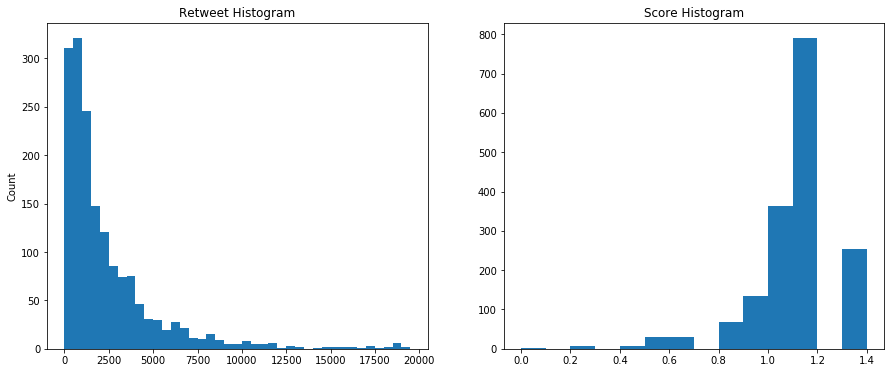

In [1127]:
f, ax = plt.subplots(1,2,figsize=(15, 6))

ax[0].hist(dogs_only.retweets, bins=np.arange(0,20000,500))
ax[0].set_title('Retweet Histogram')
ax[0].set_ylabel('Count')
ax[1].hist(dogs_only.score, bins=np.arange(0,1.5,.1))
ax[1].set_title('Score Histogram');

### So we have long tailed data on retweets

In [1128]:
dogs_only.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favs,followers,joke,age,jpg_url,img_num,dog_type,prob,score
1822,676575501977128964,2015-12-15 01:32:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper is very passionate about Christmas. Wanted to give the tree a hug. So cute. 8/10 https://t.co/NsGyECJuq7,https://twitter.com/dog_rates/status/676575501977128964/photo/1,8.0,10.0,,1235.0,2765.0,5982111.0,False,pupper,https://pbs.twimg.com/media/CWOt07EUsAAnOYW.jpg,1,yorkshire_terrier,0.073144,0.8
287,838561493054533637,2017-03-06 01:26:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Walter. His owner has been watching all the Iditarod coverage and is convinced Walter can be a sled dog. 13/10 Walter isn't so sure https://t.co/0av1PEehFI,https://twitter.com/dog_rates/status/838561493054533637/photo/1,13.0,10.0,Walter,1472.0,11725.0,5981641.0,False,,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,kelpie,0.216562,1.3


## Let's look at Retweets overall

In [1211]:
dog_ret_1 = df.groupby("dog_type").agg({"retweets": [np.mean, np.sum]})
dog_ret_1.retweets.sort_values('mean', ascending=False)

,mean,sum
dog_type,,
brown_bear,20105.000000,20105.0
gondola,16435.500000,32871.0
beaver,15950.000000,15950.0
revolver,14443.000000,14443.0
prison,14375.500000,28751.0
quilt,12321.000000,12321.0
limousine,11852.000000,11852.0
barbell,10742.000000,10742.0
pillow,9844.000000,9844.0


In [1130]:
(dog_ret_1[dog_ret_1.index=='golden_retriever'],dog_ret_1.index.get_loc('golden_retriever'))

(                     retweets          
                          mean       sum
 dog_type                               
 golden_retriever  3690.070064  579341.0, 116)

## Ha! So his sense of humour really works!
#### Golden Retriever doesn't even break the top 100, although it has the most absolute due to the large number of tweets

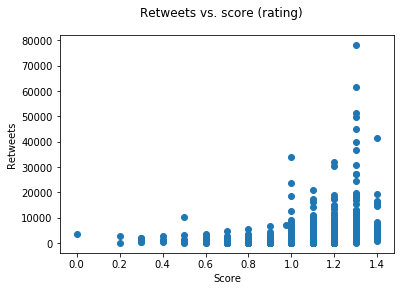

In [1131]:
f, ax = plt.subplots()
ax.scatter(dogs_only.score, dogs_only.retweets)
ax.set_xlabel('Score')
ax.set_ylabel('Retweets')
f.suptitle('Retweets vs. score (rating)');

#### Let's look at followers

In [1245]:
dog_time = dogs_only.sort_values('timestamp', ascending=False)

In [1246]:
dog_time.iloc[0].timestamp-dog_time.iloc[-1].timestamp

Timedelta('624 days 01:45:19')

#### So we're looking at a 1 year and 9 months

In [1247]:
dog_time.followers.max()-dog_time.followers.min()

818.0

In [1248]:
list(dog_time)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweets',
 'favs',
 'followers',
 'joke',
 'age',
 'jpg_url',
 'img_num',
 'dog_type',
 'prob',
 'score']

In [1252]:
dog_time = dog_time.reset_index()
dog_time = dog_time.drop(columns=('index'))
diff = dog_time['followers'] - dog_time['followers'].shift(1)

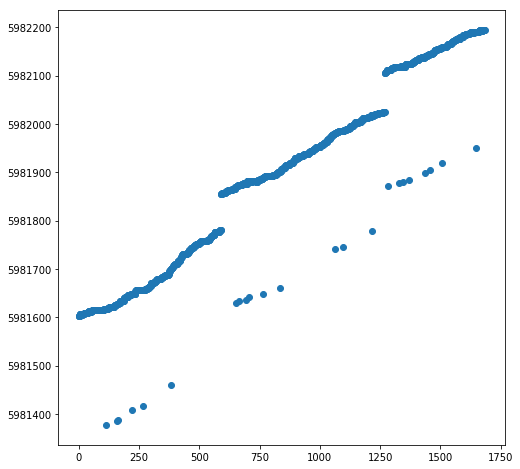

In [1253]:
from matplotlib.ticker import FuncFormatter
def show_the_number(x, pos):
    'The two args are the value and tick position'
    return '%d' % (x)
f,ax = plt.subplots(figsize=(8,8))

ax.scatter(x= dog_time.index, y= dog_time.followers)

ax.yaxis.set_major_formatter(FuncFormatter(show_the_number));

### So we are gaining followers with time
#### There's a spot of anomalies, which seem to be either one-offs on a day change 
#### The relatively small range compared to the massive range of retweets makes it hard to evaluate how much retweets increase followers. Many tweets have the same number of followers, so it's hard to track which tweet 'did it'
#### The jumps at 413 and 1093 seem to just be from longer interval between tweets. The tweets themselves didn't seem to be unusual. (see below)


In [1254]:
diff.sort_values(ascending=False)

158     241.0
1063    241.0
767     241.0
1509    240.0
1369    240.0
834     240.0
222     240.0
1648    240.0
1330    240.0
664     240.0
653     240.0
1435    240.0
1283    240.0
266     240.0
709     240.0
1347    240.0
696     240.0
1456    240.0
383     240.0
1216    240.0
113     240.0
164     240.0
1096    240.0
1270    81.0 
590     74.0 
187     5.0  
1178    5.0  
235     5.0  
376     4.0  
896     4.0  
       ...   
62     -1.0  
47     -1.0  
713    -1.0  
1574   -1.0  
1349   -1.0  
357    -1.0  
652    -239.0
1368   -239.0
382    -240.0
1282   -240.0
1329   -240.0
1215   -240.0
766    -240.0
1434   -240.0
833    -240.0
1095   -240.0
163    -240.0
1346   -240.0
708    -240.0
1062   -240.0
695    -240.0
221    -240.0
265    -240.0
112    -240.0
663    -240.0
1455   -240.0
1508   -240.0
1647   -240.0
157    -240.0
0      NaN   
Name: followers, Length: 1684, dtype: float64

In [1259]:
dog_time.loc[589:590]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favs,followers,joke,age,jpg_url,img_num,dog_type,prob,score
589,758828659922702336,2016-07-29 00:57:05,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q,https://twitter.com/dog_rates/status/758828659922702336/photo/1,13.0,10.0,,4293.0,12202.0,5981780.0,False,doggo,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,1,chesapeake_bay_retriever,0.480048,1.3
590,758740312047005698,2016-07-28 19:06:01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Boston. He's worried because his tongue won't fit all the way in his mouth. 12/10 it'll be ok deep breaths pup https://t.co/rfWQ4T9iQj,https://twitter.com/dog_rates/status/758740312047005698/photo/1,12.0,10.0,Boston,1787.0,6243.0,5981854.0,False,,https://pbs.twimg.com/media/CoeWSJcUIAAv3Bq.jpg,1,chesapeake_bay_retriever,0.848514,1.2


In [1257]:
dog_time.loc[1269:1270]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favs,followers,joke,age,jpg_url,img_num,dog_type,prob,score
1269,677187300187611136,2015-12-16 18:03:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we see a Byzantine Rigatoni. Very aerodynamic. No eyes. Actually not windy here they just look like that. 9/10 https://t.co/gzI0m6wXRo,https://twitter.com/dog_rates/status/677187300187611136/photo/1,9.0,10.0,,1010.0,2922.0,5982025.0,False,,https://pbs.twimg.com/media/CWXaQMBWcAAATDi.jpg,1,english_setter,0.282396,0.9
1270,676975532580409345,2015-12-16 04:01:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cooper. He doesn't know how cheese works. Likes the way it feels on his face. Cheeky tongue slip. 11/10 https://t.co/j1zczS0lI5,https://twitter.com/dog_rates/status/676975532580409345/photo/1,11.0,10.0,Cooper,1178.0,2960.0,5982106.0,False,,https://pbs.twimg.com/media/CWUZpydWcAAeipD.jpg,1,malamute,0.363257,1.1
